In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [232]:
df = pd.read_csv("data/placement.csv")
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [233]:
df.shape

(200, 2)

In [234]:
df = df.iloc[140:160,:]

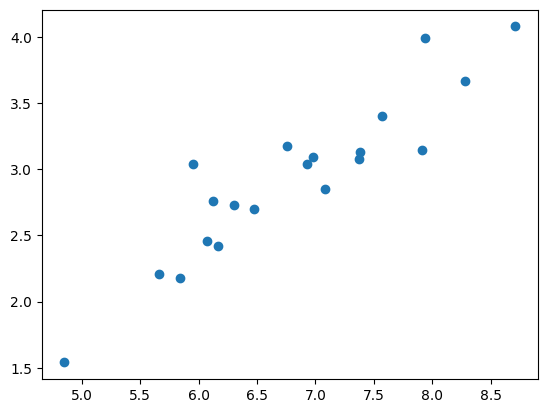

In [235]:
plt.scatter(df['cgpa'], df['package'])

<Axes: xlabel='cgpa', ylabel='package'>

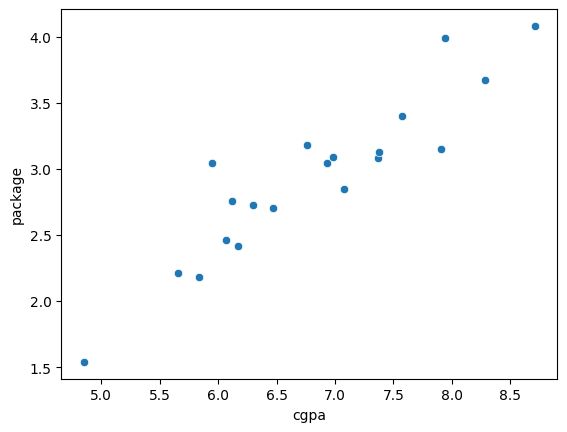

In [236]:
sns.scatterplot(df,x = 'cgpa', y = 'package')

## Applyin gradient descent

In [237]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [238]:
x = df.iloc[:,:1]
y = df.iloc[:,-1]

In [239]:
x.shape,y.shape

((20, 1), (20,))

In [240]:
lr = LinearRegression()
lr.fit(x,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


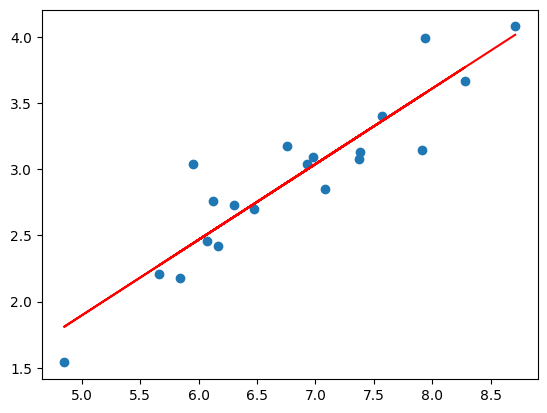

In [241]:
plt.scatter(x,y)
plt.plot(x,lr.predict(x),color='red')
plt.show()

In [242]:
lr.coef_,lr.intercept_

(array([0.5716785]), np.float64(-0.9621323338386718))

## Visualize the values when m is kept constant

In [243]:
b = 10
m = 0.5716785
x= x.to_numpy()

slope= -361.51470661999997  b= -6.3848529338
slope= -216.90882397200002  b= -4.215764694080001
slope= -130.14529438320002  b= -2.9143117502480003
slope= -78.08717662992001  b= -2.1334399839488003
slope= -46.85230597795202  b= -1.66491692416928
slope= -28.111383586771204  b= -1.383803088301568
slope= -16.86683015206272  b= -1.2151347867809408
slope= -10.120098091237635  b= -1.1139338058685644
slope= -6.072058854742579  b= -1.0532132173211386
slope= -3.6432353128455484  b= -1.0167808641926832
slope= -2.185941187707333  b= -0.9949214523156099
slope= -1.311564712624401  b= -0.9818058051893659
slope= -0.7869388275746401  b= -0.9739364169136195
slope= -0.47216329654478617  b= -0.9692147839481717
slope= -0.28329797792687383  b= -0.966381804168903


/home/rathan-r-nayak/Rathan/Machine Learning/machine-leaning/MachineLearning/MLenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/rathan-r-nayak/Rathan/Machine Learning/machine-leaning/MachineLearning/MLenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/rathan-r-nayak/Rathan/Machine Learning/machine-leaning/MachineLearning/MLenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/rathan-r-nayak/Rathan/Machine Learning/machine-leaning/MachineLearning/MLenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRe

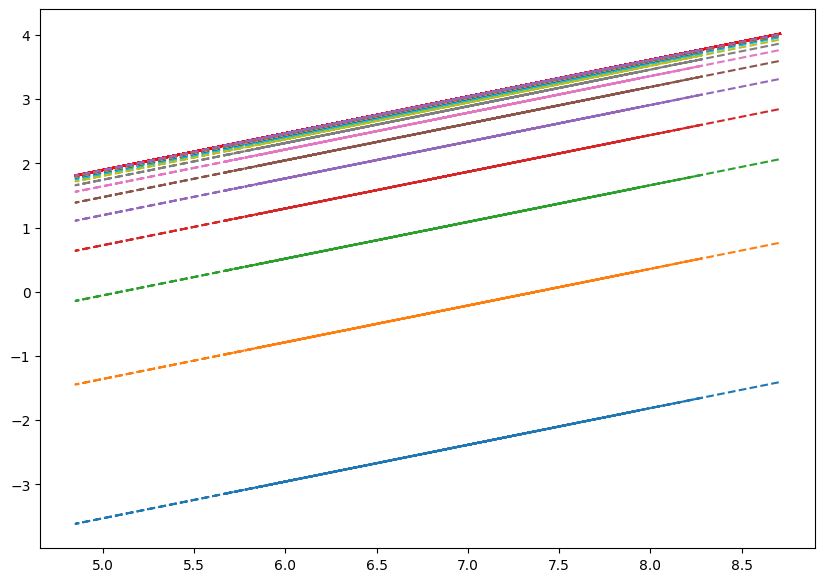

In [244]:
# lets have the slope m = 0.5716785
b = -10
m = 0.5716785
eta = 0.01

epoch = 15
plt.figure(figsize=(10, 7))

for i in range(epoch):
    slope = -2 * np.sum(y - m * x.ravel() - b)
    b = b - eta * slope
    ypred = (m * x) + b
    print("slope=",slope, " b=",b)

    plt.plot(x,lr.predict(x),color='red',label='ols')
    plt.plot(x,ypred,linestyle='--',label='custom')
    # plt.show()blue'

    

## Custom Gradient Descent

In [245]:
df = pd.read_csv("data/placement.csv")
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [246]:
df.iloc[:,-1].shape

(200,)

In [247]:
xtrain,xtest,ytrain,ytest = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],train_size=0.95,random_state=42)

In [248]:
xtrain.shape,ytrain.shape

((190, 1), (190,))

In [249]:
lr2 = LinearRegression()
lr2.fit(xtrain,ytrain)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [250]:
class GradientDescent:
    def __init__(self,lr,epoch):
        self.m = 0
        self.b = 0
        self.lr = lr
        self.epoch = epoch
        plt.figure(figsize=(10, 7))


    def fit(self,xtrain,ytrain):
        plt.plot(xtrain,lr2.predict(xtrain),color='red')
        for i in range(self.epoch):
            slope_b = (-2/ xtrain.shape[0]) * np.sum(ytrain - self.m * xtrain.ravel() - self.b)
            slope_m = (-2/ xtrain.shape[0]) * np.sum((ytrain - self.m * xtrain.ravel() - self.b) * xtrain.ravel())

            self.b = self.b - self.lr * slope_b
            self.m = self.m - self.lr * slope_m

            # plt.plot(x,lr.predict(x),color='red',label='ols')
            plt.plot(xtrain,self.predict(xtrain),linestyle='--',label='custom')
        plt.show()
        
    def predict(self,xtest):
        return self.m * xtest.ravel() + self.b

/home/rathan-r-nayak/Rathan/Machine Learning/machine-leaning/MachineLearning/MLenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


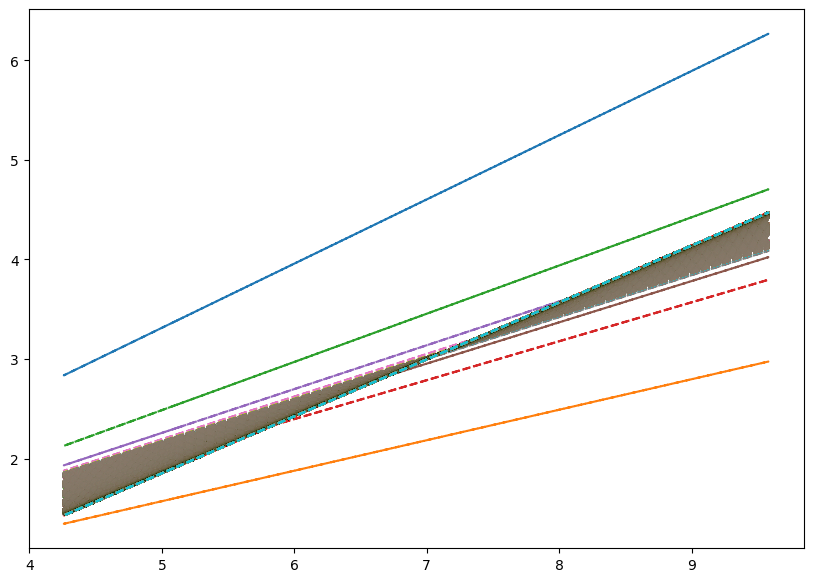

In [251]:
gd = GradientDescent(0.015,12000)
gd.fit(xtrain.to_numpy(),ytrain.to_numpy())

In [252]:
gd.m,gd.b

(np.float64(0.5717794360934538), np.float64(-1.0061715732363055))

In [253]:
lr2.coef_,lr2.intercept_

(array([0.57181765]), np.float64(-1.0064445446686259))

In [254]:
x.shape[0]

20

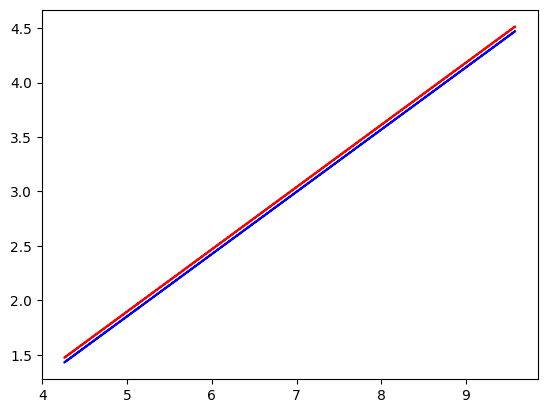

In [255]:
plt.plot(xtrain, gd.predict(xtrain.to_numpy()), color='blue')
plt.plot(xtrain, lr.predict(xtrain), color='red')

## Using standard scaler

In [256]:
from sklearn.preprocessing import StandardScaler

In [257]:
scaler = StandardScaler()
xtrain_sclaed = scaler.fit_transform(xtrain)

In [258]:
lr_scaler = LinearRegression()
lr_scaler.fit(xtrain_sclaed,ytrain)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [259]:
class GradientDescentOnStandardScaler:
    def __init__(self,lr,epoch):
        self.m = 0
        self.b = 0
        self.lr = lr
        self.epoch = epoch
        plt.figure(figsize=(10, 7))


    def fit(self,xtrain,ytrain):
        plt.plot(xtrain,lr_scaler.predict(xtrain),color='red')
        for i in range(self.epoch):
            slope_b = (-2/ xtrain.shape[0]) * np.sum(ytrain - self.m * xtrain.ravel() - self.b)
            slope_m = (-2/ xtrain.shape[0]) * np.sum((ytrain - self.m * xtrain.ravel() - self.b) * xtrain.ravel())

            self.b = self.b - self.lr * slope_b
            self.m = self.m - self.lr * slope_m

            # plt.plot(x,lr.predict(x),color='red',label='ols')
            plt.plot(xtrain,self.predict(xtrain),linestyle='--',label='custom')
        plt.show()
        
    def predict(self,xtest):
        return self.m * xtest.ravel() + self.b

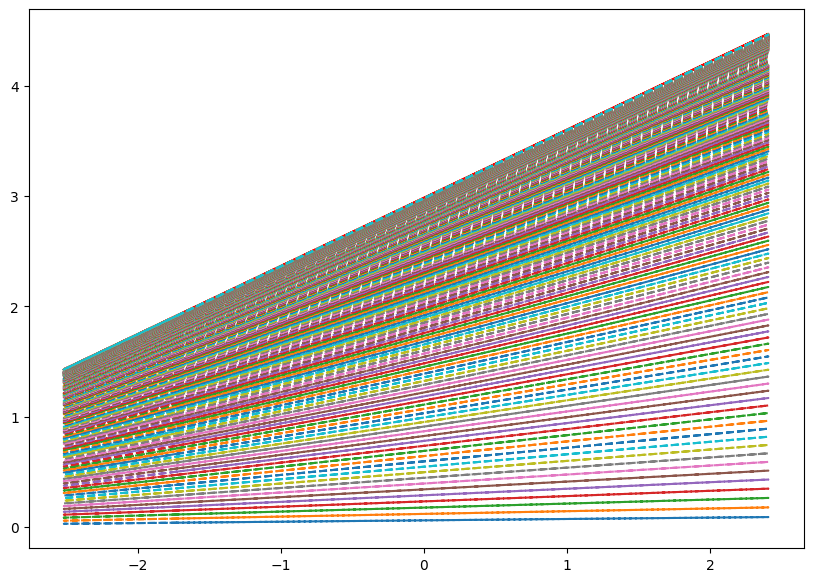

In [276]:
gd_scaler = GradientDescentOnStandardScaler(0.01,320)
gd_scaler.fit(xtrain_sclaed,ytrain)

In [277]:
gd_scaler.m,gd_scaler.b

(np.float64(0.6169090249189927), np.float64(2.9793533170557844))

In [280]:
lr_scaler.coef_,lr_scaler.intercept_

(array([0.61787117]), np.float64(2.984))

/home/rathan-r-nayak/Rathan/Machine Learning/machine-leaning/MachineLearning/MLenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2684: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


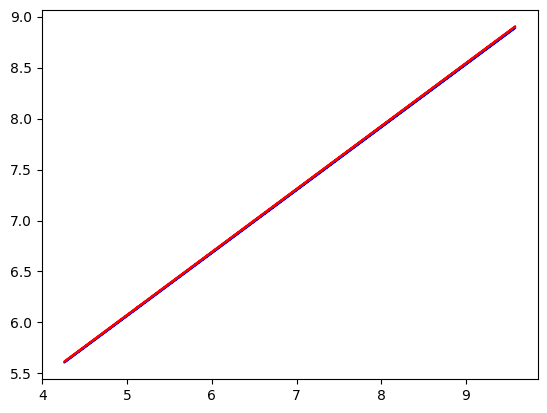

In [279]:
plt.plot(xtrain, gd_scaler.predict(xtrain.to_numpy()), color='blue')
plt.plot(xtrain, lr_scaler.predict(xtrain), color='red')